# SVOFilter example

Author: Hannu Parviainen <br>
Last updated: 4.5.2021

The `ldtk.SVOFilter` filter class can be used to create a filter from the [Spanish Virtual Observatory (SVO) Filter Profile Service (FPS)](http://svo2.cab.inta-csic.es/theory/fps/). The class uses `astroquery` to download the data, and so naturally requires an internet connection.

`SVOFilter` takes only a filter name as an argument, which can be either a full SVO FPS filter name such as `SLOAN/SDSS.g` or a name shortcut such as `Kepler`.

In [1]:
%pylab inline
from ldtk import SVOFilter, LDPSetCreator
from IPython.display import display, Latex


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
SVOFilter.shortcuts

{'kepler': 'Kepler/Kepler.k',
 'tess': 'TESS/TESS.Red',
 'sdss_g': 'SLOAN/SDSS.g',
 'sdss_r': 'SLOAN/SDSS.r',
 'sdss_i': 'SLOAN/SDSS.i',
 'sdss_z': 'SLOAN/SDSS.z'}

In [3]:
# Check which filter was used to gather the TASTE data, 
# different datasets may have been gathered with different filters

sloan_r = SVOFilter('SLOAN/SDSS.r')
sloan_rprime = SVOFilter('SLOAN/SDSS.rprime_filter')
tess_fr = SVOFilter('TESS')


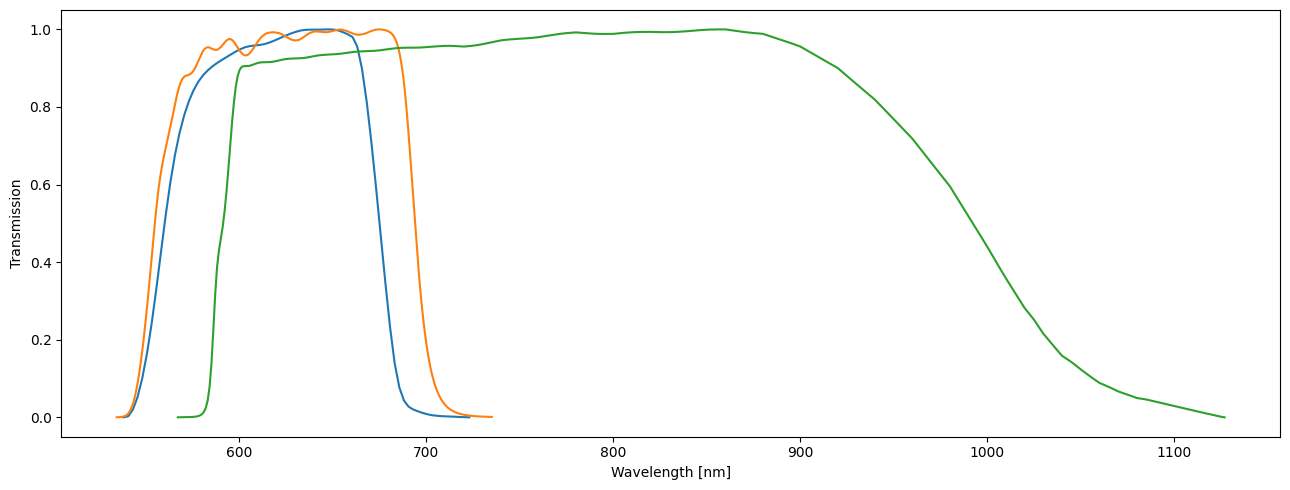

In [4]:
fig, ax = subplots(figsize=(13,5))
sloan_r.plot(ax=ax)
sloan_rprime.plot(ax=ax)
tess_fr.plot(ax=ax)
fig.tight_layout()


In [5]:
filters = [
    sloan_r,
    sloan_rprime,
    tess_fr]

---

<center>&copy;2021 Hannu Parviainen</center>

In [6]:
#Stellar parameters (temperature, surface gravity, and metallicity) of WASP-135 from the Exoplanet Archive

sc = LDPSetCreator(teff=(5675,60), logg=(4.47,0.03), z=(0.020,0.130), filters=filters)


In [7]:
#Applying 2000 different simulations for different values of stellar parameters within the error scales.

ps = sc.create_profiles(nsamples=2000)
ps.resample_linear_z(100)

ps.set_uncertainty_multiplier(10)

qm,qe = ps.coeffs_qd(do_mc=True, n_mc_samples=10000)

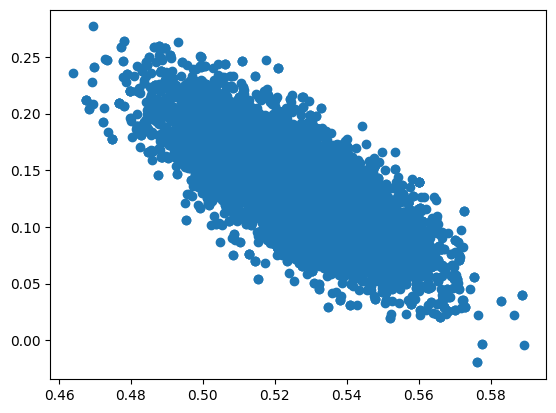

In [8]:
chains = array(ps._samples['qd'])
np.shape(chains)

plt.figure()
plt.scatter(chains[0,:,0], chains[0,:,1])
plt.show()

In [9]:
for i, (c, e) in enumerate(zip(qm, qe)):
    display(Latex('u$_{i:d} = {c[0]:5.4f} \pm {e[0]:5.4f}\quad$'
                  'v$_{i:d} = {c[1]:5.4f} \pm {e[1]:5.4f}$'.format(i=i+1,c=c,e=e)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The error is brutally underestimated, as it doesn't take into account possible differences between filters at different telescopes and the error in the theoretical models of atmospheres.